In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import Binarizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

In [15]:
X = pd.read_csv("cancerdata.csv")

In [16]:
X.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [17]:
X.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.037183e+07,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [18]:
#Replace category with numbers
X['diagnosis']=X['diagnosis'].replace({'B':1,'M':0})

In [19]:
X.describe(include='all')

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [20]:
#Getting output variable
y = X.pop("diagnosis")

In [22]:
y.describe()

count    569.000000
mean       0.627417
std        0.483918
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

In [23]:
import matplotlib.pyplot as plt
X.boxplot(column=['radius_mean'],grid=True)

In [24]:
X.dtypes

id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [44]:
#Filtering out numberic variables alone
num_var=list(X.dtypes[X.dtypes != "object"].index)
num_var.remove('id')
X[num_var].head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [30]:
#Without scaling up the variables
model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123)
model.fit(X[num_var],y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

In [31]:
model.oob_score_

0.968365553602812

In [32]:
#Split train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X[num_var],y,test_size=0.2,random_state=123)

In [46]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [50]:
#Fitting data after scaling
rfc = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=123, verbose=0,
                       warm_start=False)

In [51]:
rfc.oob_score_

0.9582417582417583

In [54]:
y_predict=rfc.predict(X_test)

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
print(accuracy_score(y_test,y_predict))

[[40  1]
 [ 3 70]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95        41
           1       0.99      0.96      0.97        73

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114

0.9649122807017544


In [60]:
#variable importance measures
rfc.feature_importances_

array([0.02918871, 0.01255363, 0.04051984, 0.0345468 , 0.00636244,
       0.01425057, 0.0638426 , 0.13395105, 0.00365577, 0.00518136,
       0.0078503 , 0.00386485, 0.01050349, 0.04122538, 0.00468192,
       0.00362958, 0.00487076, 0.00332031, 0.00460074, 0.00528075,
       0.11080553, 0.02518899, 0.09863348, 0.12884984, 0.01515407,
       0.01468014, 0.03189911, 0.12721975, 0.00807328, 0.00561496])

In [61]:
%matplotlib inline

radius_mean                0.029189
texture_mean               0.012554
perimeter_mean             0.040520
area_mean                  0.034547
smoothness_mean            0.006362
compactness_mean           0.014251
concavity_mean             0.063843
concave points_mean        0.133951
symmetry_mean              0.003656
fractal_dimension_mean     0.005181
radius_se                  0.007850
texture_se                 0.003865
perimeter_se               0.010503
area_se                    0.041225
smoothness_se              0.004682
compactness_se             0.003630
concavity_se               0.004871
concave points_se          0.003320
symmetry_se                0.004601
fractal_dimension_se       0.005281
radius_worst               0.110806
texture_worst              0.025189
perimeter_worst            0.098633
area_worst                 0.128850
smoothness_worst           0.015154
compactness_worst          0.014680
concavity_worst            0.031899
concave points_worst       0

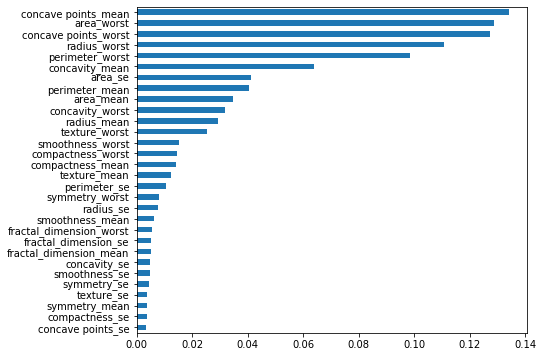

In [72]:
feature_importances=pd.Series(rfc.feature_importances_,index=X[num_var].columns)
print(feature_importances)
feature_importances.sort_values(inplace=True)
feature_importances.plot(kind='barh',figsize=(7,6))

In [90]:
#n_jobs
%%timeit
model=RandomForestClassifier(1000,oob_score=True,n_jobs=1,random_state=123)
model.fit(X[num_var],y)

3.25 s ± 180 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [91]:
%%timeit
model=RandomForestClassifier(1000,oob_score=True,n_jobs=-1,random_state=123)
model.fit(X[num_var],y)

2.51 s ± 90.5 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


30 trees
0.9595782073813708 OOB
 
50 trees
0.9648506151142355 OOB
 
100 trees
0.968365553602812 OOB
 
200 trees
0.9666080843585237 OOB
 
500 trees
0.9630931458699473 OOB
 
1000 trees
0.9666080843585237 OOB
 
2000 trees
0.9648506151142355 OOB
 
3000 trees
0.9648506151142355 OOB
 


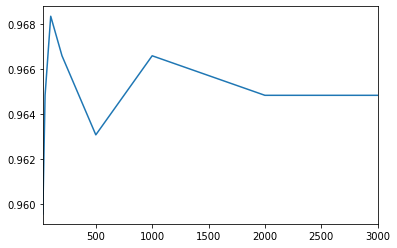

In [94]:
#n_estimators

output=[]
n_estimator_options=[30,50,100,200,500,1000,2000,3000]

for trees in n_estimator_options:
    model=RandomForestClassifier(trees,oob_score=True,n_jobs=-1,random_state=123)
    model.fit(X[num_var],y)
    print(trees,'trees')
    OOB=model.oob_score_
    print(OOB,'OOB')
    output.append(OOB)
    print(" ")
pd.Series(output,n_estimator_options).plot()

1 min samples
OOB:  0.961335676625659
 
2 min samples
OOB:  0.9666080843585237
 
3 min samples
OOB:  0.961335676625659
 
4 min samples
OOB:  0.961335676625659
 
5 min samples
OOB:  0.9595782073813708
 
6 min samples
OOB:  0.9595782073813708
 
7 min samples
OOB:  0.9578207381370826
 
8 min samples
OOB:  0.9595782073813708
 
9 min samples
OOB:  0.9543057996485061
 
10 min samples
OOB:  0.9543057996485061
 


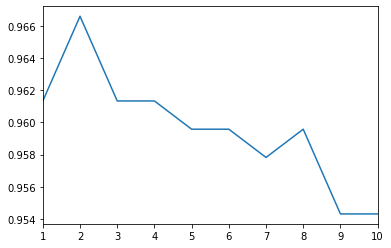

In [95]:
#Min Sample leaf

output = []
min_samples_leaf_options = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

for min_samples in min_samples_leaf_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features="auto", min_samples_leaf=min_samples)
    #model.fit(X, y)
    model.fit(X[num_var], y)
    print(min_samples, "min samples")
    OOB = model.oob_score_
    print('OOB: ', OOB)
    output.append(OOB)
    print (" ")
    
pd.Series(output, min_samples_leaf_options).plot()

auto No_Of_features
OOB:  0.961335676625659
 
None No_Of_features
OOB:  0.9630931458699473
 
sqrt No_Of_features
OOB:  0.961335676625659
 
log2 No_Of_features
OOB:  0.961335676625659
 
0.9 No_Of_features
OOB:  0.9648506151142355
 
0.2 No_Of_features
OOB:  0.961335676625659
 
1 No_Of_features
OOB:  0.9595782073813708
 


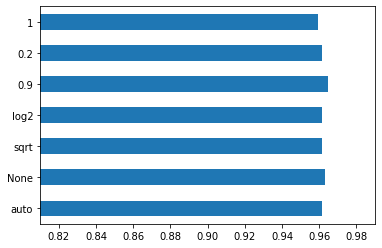

In [97]:
output = []
max_features_options = ["auto", None, "sqrt", "log2", 0.9, 0.2,1]

for max_features in max_features_options:
    model = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=42, max_features=max_features)
    model.fit(X[num_var], y)
    print(max_features, "No_Of_features")
    OOB = model.oob_score_
    print('OOB: ', OOB)
    output.append(OOB)
    print (" ")
    
pd.Series(output, max_features_options).plot(kind='barh', xlim=(.81, .99))

In [98]:
#Final Model
model = RandomForestClassifier(n_estimators=1000, 
                              oob_score=True, 
                              n_jobs=-1, 
                              random_state=42, 
                              max_features=0.9, 
                              min_samples_leaf=2)
model.fit(X[num_var], y)
OOB = model.oob_score_
print('OOB: ', OOB)
# w/o scaler C-stat:  0.874269005848
# w/ scaler C-stat:  0.874380851948

OOB:  0.9630931458699473


In [99]:
#Train data evaluation

train_X_evaluation = X[num_var]
train_y_evaluation= y

In [100]:
pred = model.predict(train_X_evaluation)

In [101]:
print(confusion_matrix(train_y_evaluation, pred))

[[208   4]
 [  0 357]]


In [102]:
print(accuracy_score(train_y_evaluation, pred))

0.9929701230228472


In [104]:
from sklearn.metrics import classification_report
target_names=['Cancer','not-cancer']
print(classification_report(train_y_evaluation, pred, target_names=target_names))

              precision    recall  f1-score   support

      Cancer       1.00      0.98      0.99       212
  not-cancer       0.99      1.00      0.99       357

    accuracy                           0.99       569
   macro avg       0.99      0.99      0.99       569
weighted avg       0.99      0.99      0.99       569

